# 1.Business Problem
A glass manufacturing plant uses different earth elements to design new glass materials based on customer requirements. For that, they would like to automate the process of classification as it’s a tedious job to manually classify them. Help the company achieve its objective by correctly classifying the glass type based on the other features using KNN algorithm.

# 1.1 Business Objective

 The objective is to automate the classification of glass types in a manufacturing plant. The company wants to categorize glass materials based on various chemical properties (e.g., Na, Mg, Al, Si, etc.) to streamline the production process and meet customer specifications efficiently. This will reduce the manual workload and improve accuracy in meeting product requirements.

# 1.2 Constraints

Accuracy: The classification model should achieve high accuracy to ensure that the glass types are identified correctly, as incorrect classifications could lead to product defects or unmet customer expectations.

Data Quality: The model's performance will depend on the quality of the input data (chemical properties).

Computational Efficiency: Since the KNN algorithm involves computing the distance for each data point, the process could be computationally intensive for larger datasets.

Scalability: The model should scale well if the dataset grows or if new glass types or features are introduced.


In [24]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [26]:
# Load dataset
data = pd.read_csv("Glass.csv")

# EDA

In [30]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None


In [32]:
print(data.describe())

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1

In [34]:
print(data.isnull().sum())

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64


In [36]:
print(data['Type'].value_counts())

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64


# Data Visulization

# Class distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=data, x='Type', palette='viridis')
plt.title('Distribution of Glass Types')
plt.show()

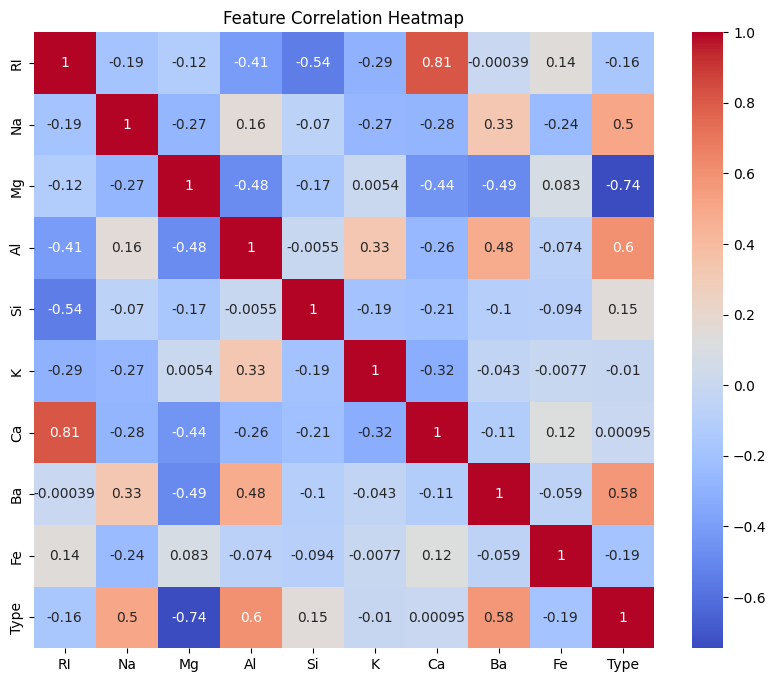

In [40]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

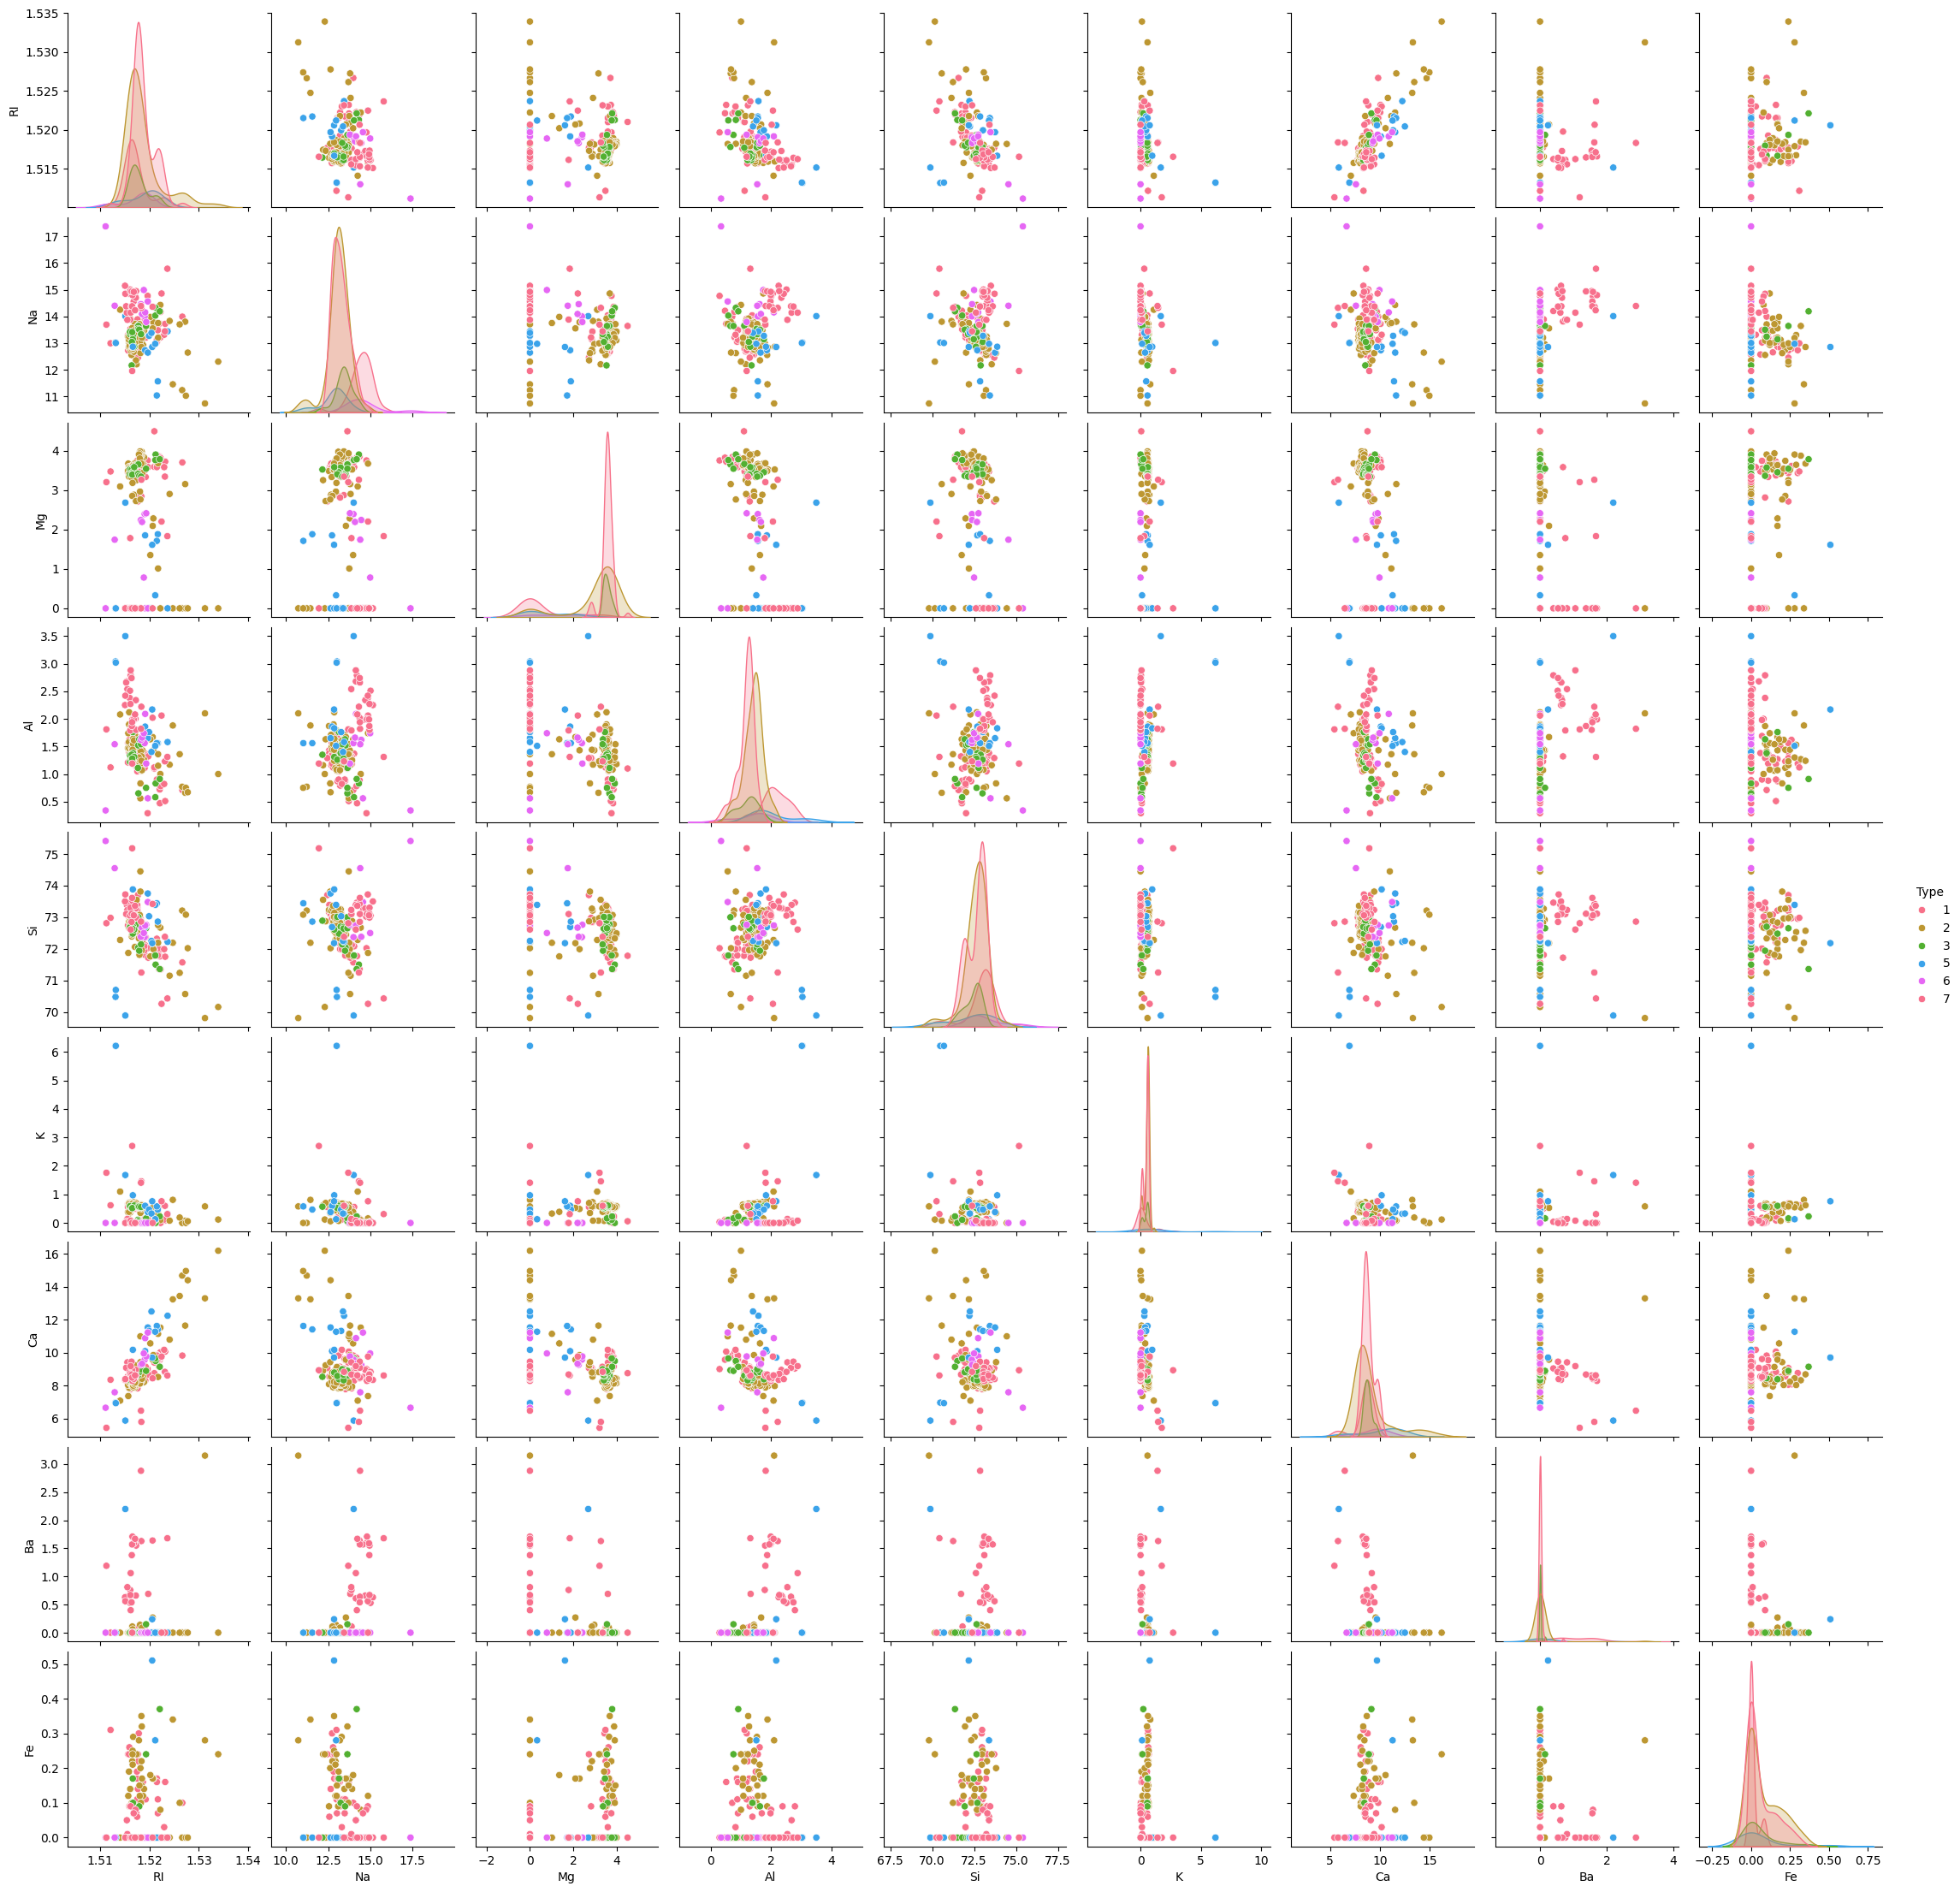

In [74]:
# Pairplot (optional for insight)
sns.pairplot(data, hue="Type", palette="husl")

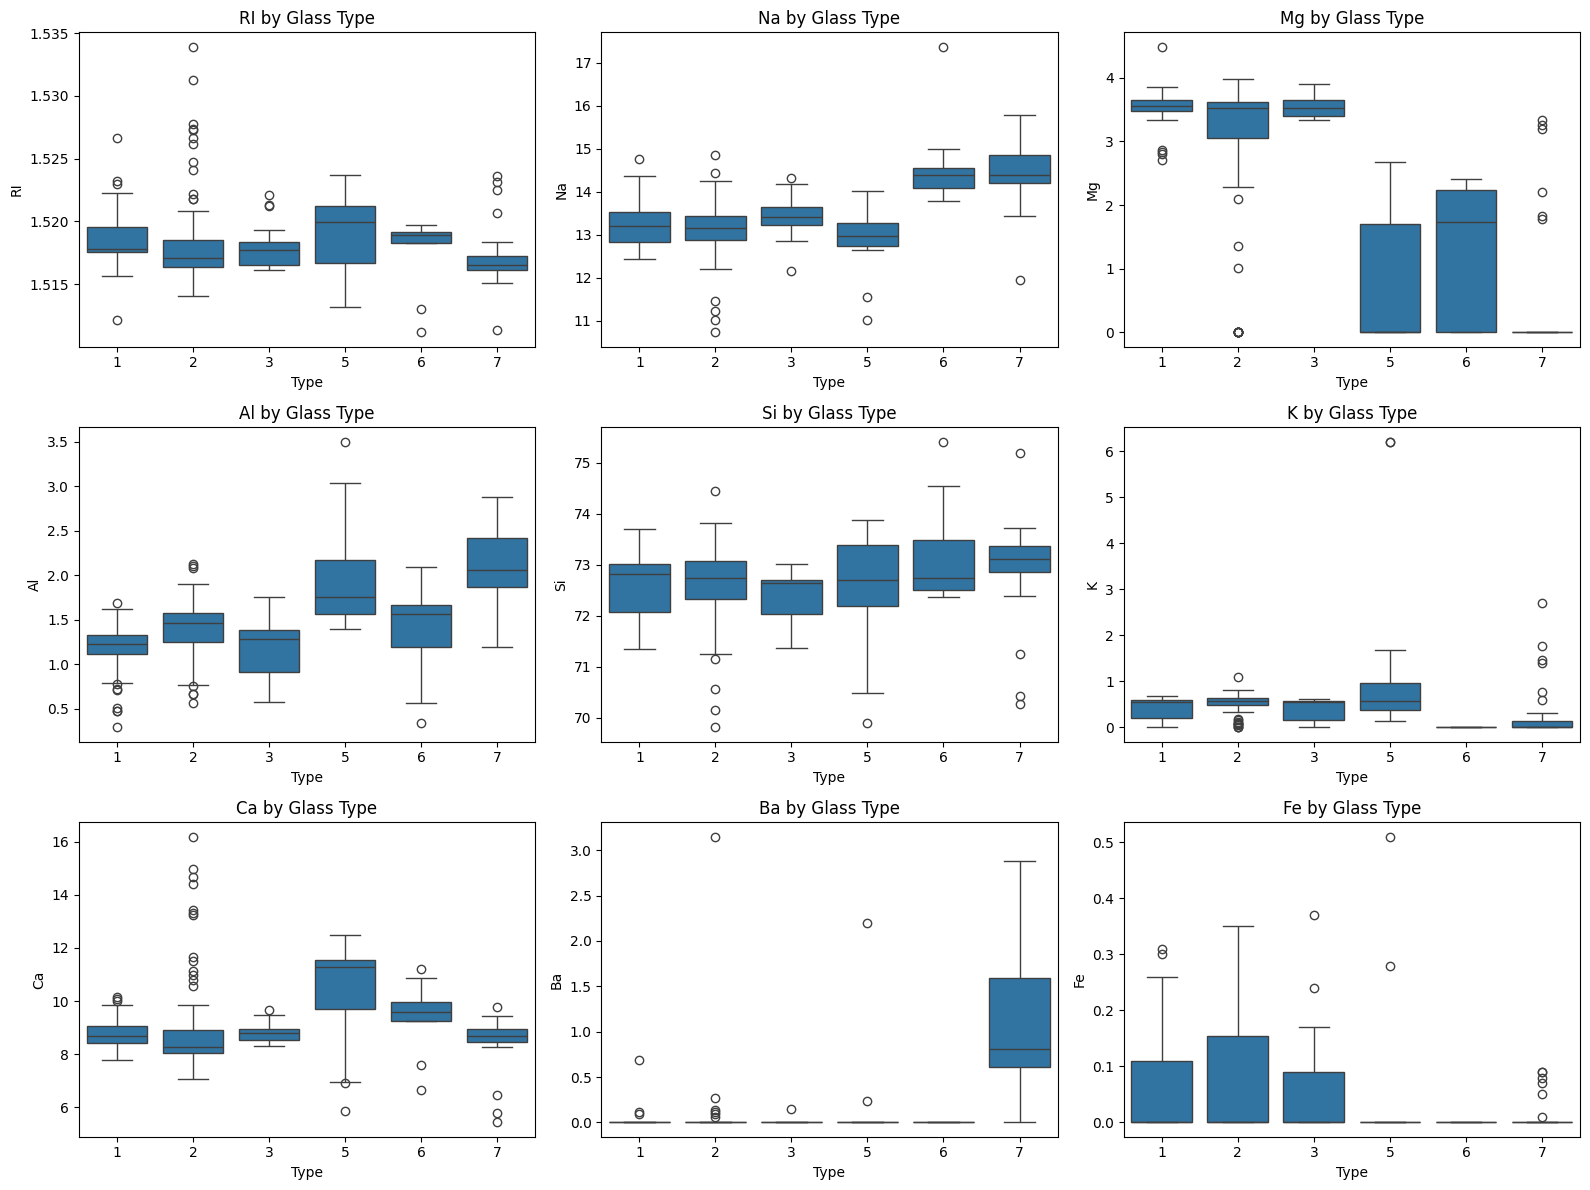

In [43]:
# Distribution of features by Type
features = data.columns[:-1]
plt.figure(figsize=(16, 12))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Type', y=feature, data=data)
    plt.title(f'{feature} by Glass Type')
plt.tight_layout()
plt.show()

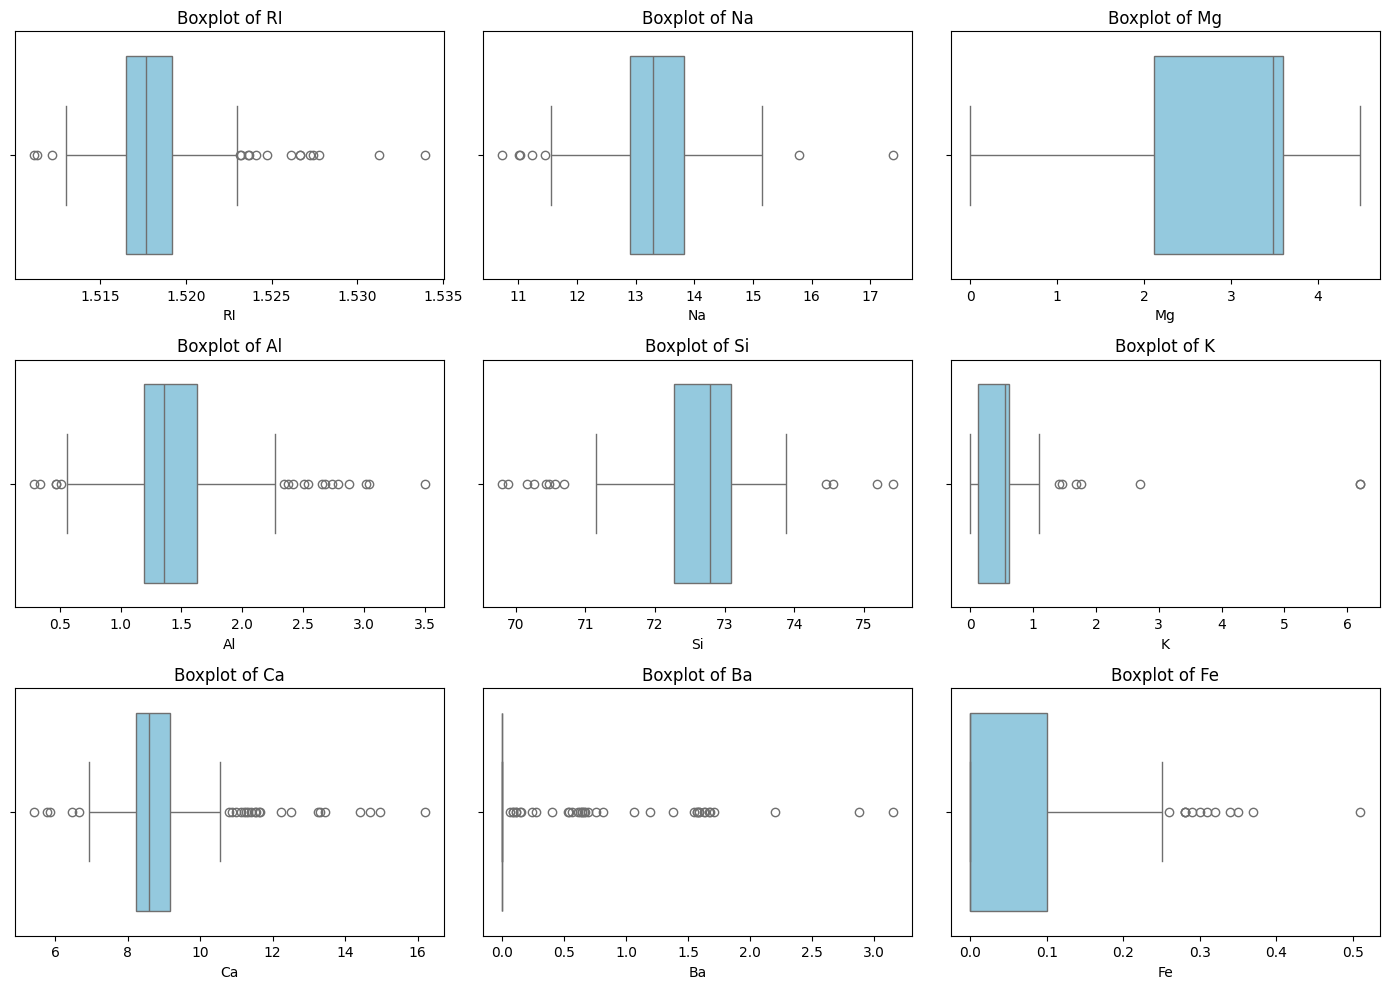

In [73]:
# Outlier Detection
plt.figure(figsize=(14, 10))
for i, col in enumerate(data.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=data[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

# Preprocessing

In [79]:
X = data.drop('Type', axis=1)
y = data['Type']

In [87]:
scaler = StandardScaler()

In [89]:
X_scaled = scaler.fit_transform(X)

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Evaluation Function

In [94]:
model_results = []

In [96]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    model_results.append([name, acc, prec, rec, f1])

    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Model 1: KNN


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           1       0.62      0.91      0.74        11
           2       0.62      0.57      0.59        14
           3       0.00      0.00      0.00         3
           5       0.50      0.25      0.33         4
           6       1.00      1.00      1.00         3
           7       0.89      1.00      0.94         8

    accuracy                           0.70        43
   macro avg       0.60      0.62      0.60        43
weighted avg       0.64      0.70      0.66        43



C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


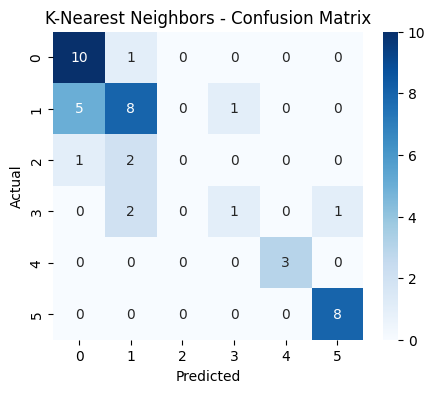

In [99]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
evaluate_model("K-Nearest Neighbors", knn, X_test, y_test)

# Model 2: Decision Tree


Decision Tree Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.91      0.80        11
           2       0.64      0.50      0.56        14
           3       0.60      1.00      0.75         3
           5       0.50      0.25      0.33         4
           6       1.00      0.67      0.80         3
           7       0.89      1.00      0.94         8

    accuracy                           0.72        43
   macro avg       0.72      0.72      0.70        43
weighted avg       0.71      0.72      0.70        43



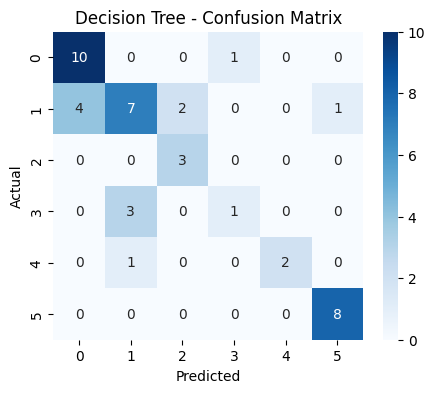

In [102]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
evaluate_model("Decision Tree", tree, X_test, y_test)

# Model 3: Logistic Regression


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.82      0.75        11
           2       0.62      0.71      0.67        14
           3       0.00      0.00      0.00         3
           5       1.00      0.50      0.67         4
           6       1.00      0.67      0.80         3
           7       0.80      1.00      0.89         8

    accuracy                           0.72        43
   macro avg       0.69      0.62      0.63        43
weighted avg       0.69      0.72      0.69        43



C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


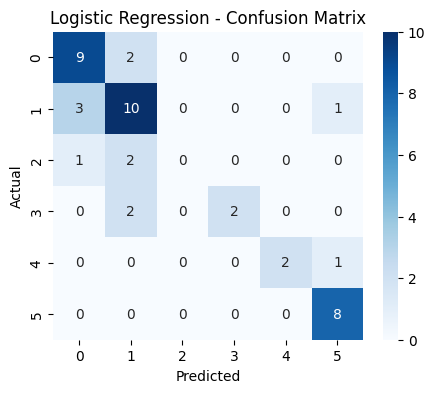

In [105]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
evaluate_model("Logistic Regression", logreg, X_test, y_test)

# Model Comparison

In [108]:
results_df = pd.DataFrame(model_results, columns=["Model", "Accuracy", "Precision", "Recall", "F1 Score"])
print("\nModel Comparison Table:")
print(results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True))


Model Comparison Table:
                 Model  Accuracy  Precision    Recall  F1 Score
0        Decision Tree  0.720930   0.713427  0.720930  0.701227
1  Logistic Regression  0.720930   0.692218  0.720930  0.692119
2  K-Nearest Neighbors  0.697674   0.641895  0.697674  0.658307


# Grid Search for Best K in KNN

In [111]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors': list(range(1, 21))}
grid_knn = GridSearchCV(KNeighborsClassifier(), params, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

print("Best K:", grid_knn.best_params_)
print("Best Cross-Validated Accuracy:", grid_knn.best_score_)


Best K: {'n_neighbors': 1}
Best Cross-Validated Accuracy: 0.6900840336134454
